In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [25]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [26]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [27]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [28]:
### what is the average Rating for products in the "Home and lifestyle" Product line?

#### Question 2 - Solution

In [29]:
filtered_df = df[df['Product line'] == 'Home and lifestyle']
average_rating = filtered_df['Rating'].mean()

# Put result in a one-row DataFrame with clear column names
result_df = pd.DataFrame(
    [['Average rating for Home and lifestyle', average_rating]],
    columns=['Description', 'Average Rating']
)

# Show result
result_df

,Description,Average Rating
0,Average rating for Home and lifestyle,6.8375


#### Question 3

In [30]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

#### Question 3 - Solution

In [31]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter for February 1–7, 2019 (inclusive)
start_date = pd.Timestamp('2019-02-01')
end_date = pd.Timestamp('2019-02-07')
first_week_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
# Group by Product line and sum the Quantity
result = first_week_df.groupby('Product line')['Quantity'].sum().reset_index()

result

,Product line,Quantity
0,Electronic accessories,92
1,Fashion accessories,67
2,Food and beverages,132
3,Health and beauty,78
4,Home and lifestyle,87
5,Sports and travel,54


#### Question 4

In [32]:
### plot a bar chart showing the number of products per category computed in the previous question

#### Question 4 - Solution

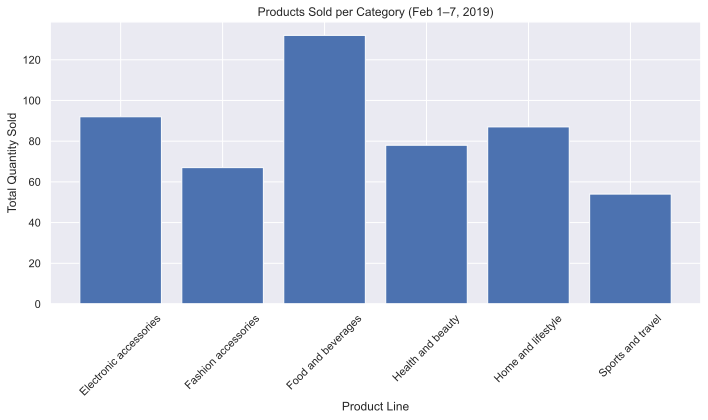

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

plt.bar(result['Product line'], result['Quantity'])

plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.title('Products Sold per Category (Feb 1–7, 2019)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Question 5

In [34]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

#### Question 5 - Solution

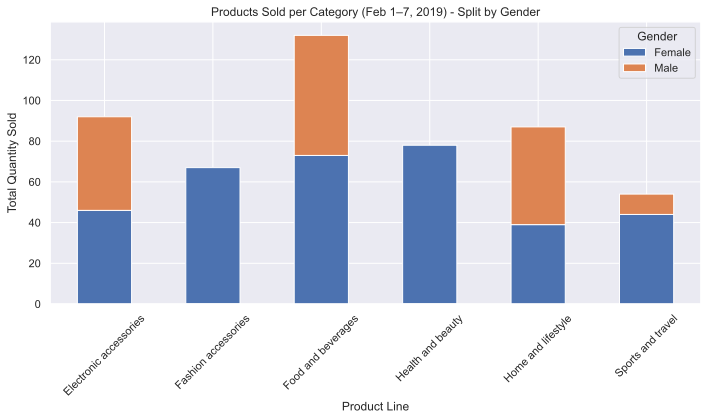

In [35]:
# Filter for Feb 1–7, 2019
df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-07')
filtered_df = df[mask]

# Group by both Product line and Gender, and sum Quantity
grouped = filtered_df.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack(fill_value=0)

# Plot as stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.title('Products Sold per Category (Feb 1–7, 2019) - Split by Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

#### Question 6

In [36]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

#### Question 6 - Solution

In [ ]:
# Group by 'Payment' and sum the 'Total' column
result = df.groupby('Payment')['Total'].sum().reset_index()

# Display the result
result

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


#### Question 7

In [38]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

#### Question 7 - Solution

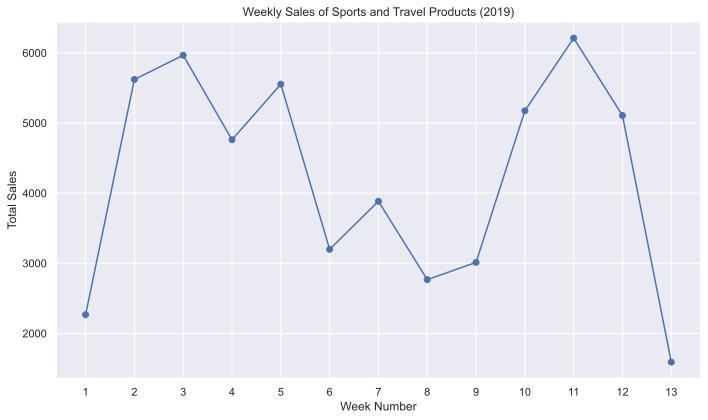

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter for 'Sports and travel' product line
sports_df = df[df['Product line'] == 'Sports and travel'].copy()

#  Extract ISO calendar week number (using .dt.isocalendar())
sports_df['Week'] = sports_df['Date'].dt.isocalendar().week

#  Group by week and sum 'Total'
weekly_sales = sports_df.groupby('Week')['Total'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total'], marker='o')

# Labeling
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.title('Weekly Sales of Sports and Travel Products (2019)')
plt.grid(True)
plt.xticks(weekly_sales['Week'])  # make x-axis show only weeks that appear
plt.tight_layout()

# Show the chart
plt.show()

#### Question 8

In [40]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 8 - Solution

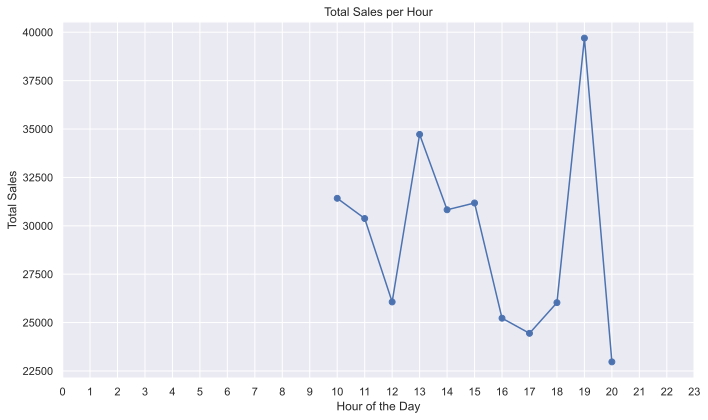

In [41]:
# Convert 'Time' to datetime using correct format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Extract hour
df['Hour'] = df['Time'].dt.hour

# Group by hour and sum total sales
hourly_sales = df.groupby('Hour')['Total'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['Hour'], hourly_sales['Total'], marker='o')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales per Hour')
plt.xticks(range(24))  # Show all 24 hours
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Question 9

In [42]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9 - Solution

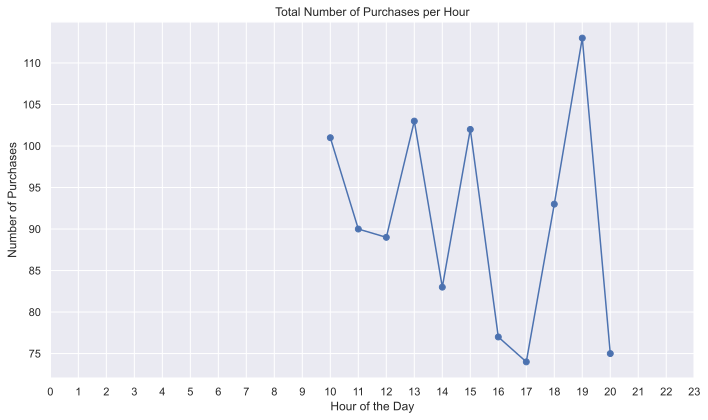

In [43]:
#  Convert 'Time' column to datetime 
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

#  Extract hour from the time
df['Hour'] = df['Time'].dt.hour

# Count number of purchases per hour
purchases_per_hour = df.groupby('Hour').size().reset_index(name='Purchase Count')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(purchases_per_hour['Hour'], purchases_per_hour['Purchase Count'], marker='o')

# Customize chart
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.title('Total Number of Purchases per Hour')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

# Show chart
plt.show()

#### Question 10

In [44]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city

#### Question 10 - Solution

In [45]:
strategy_df = pd.read_csv("product_types_strategy.csv")
sales_df = pd.read_csv("supermarket_sales.csv")

# Filter for non-strategic product types
non_strategic_products = strategy_df[strategy_df['strategic'] == 'no']['Product type']

# Filter sales for only non-strategic products
non_strategic_sales = sales_df[sales_df['Product line'].isin(non_strategic_products)]

# Group by 'Product line' and 'City', and sum the 'Total' sales
result_df = non_strategic_sales.groupby(['Product line', 'City'])['Total'].sum().reset_index()

# Sort the result for clarity
result_df = result_df.sort_values(by=['Product line', 'City'])

# Display the final DataFrame
result_df

,Product line,City,Total
0,Fashion accessories,Mandalay,16413.3165
1,Fashion accessories,Naypyitaw,21560.0700
2,Fashion accessories,Yangon,16332.5085
3,Home and lifestyle,Mandalay,17549.1645
4,Home and lifestyle,Naypyitaw,13895.5530
5,Home and lifestyle,Yangon,22417.1955
